In [41]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

In [3]:
from sklearn.model_selection import train_test_split #veri kümesini böler
from tensorflow.keras.models import Sequential #yapay sinir ağı modeli
#giriş katmanından başlayarak sıralı olarak birbirini takip eden katmanlar eklenir ve çıktı katmanına kadar devam eder

from tensorflow.keras.layers import Conv2D #2 boyutlu veriler üzerinde evrişim işlemi gerçekleştirir
from tensorflow.keras.layers import MaxPooling2D #önemli özellikleri korumak için kullanılır
from tensorflow.keras.layers import Flatten #tek boyutlu veriye dönüştürür
from tensorflow.keras.layers import Dense #full connected bağlantıları temsil edilir

#çıktı aktivasyon fonksiyonumuz. (sigmoid,softmax vb.)

In [4]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist #veri kümesi

In [5]:
tf.keras.datasets.fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [6]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [7]:
len(x_train)

60000

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [10]:
len(y_train)

60000

In [11]:
y_train[0]

9

In [12]:
y_train[5]

2

In [13]:
len(x_test)

10000

In [14]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [15]:
len(y_test)

10000

In [16]:
y_test[0]

9

In [17]:
y_train[0]

9

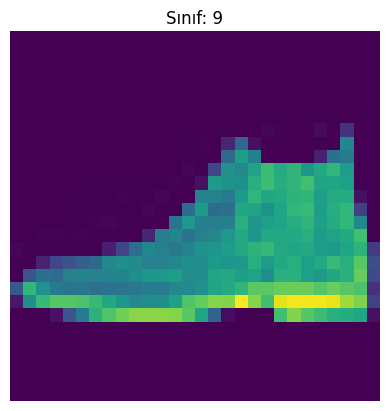

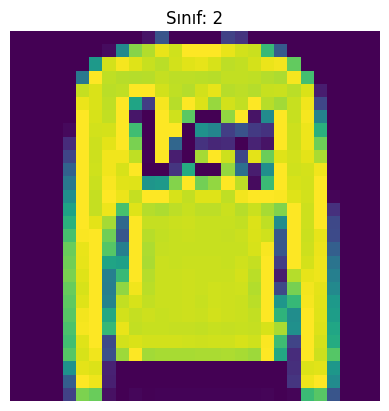

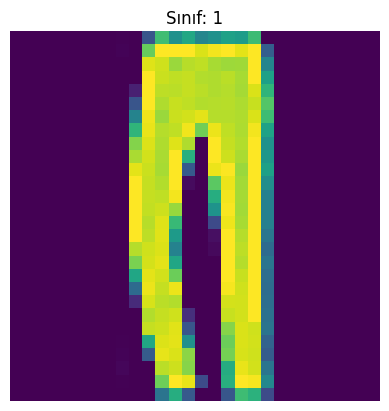

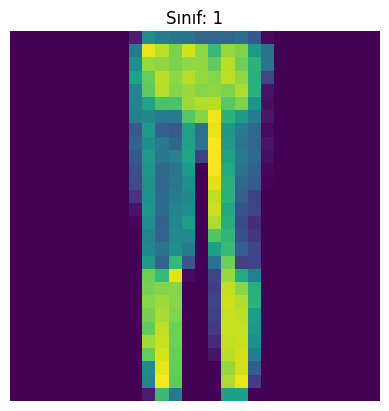

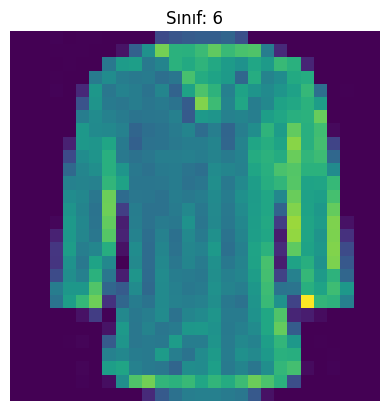

In [18]:
#veri setinden örnek resim gösterme

for i in range(5):
    plt.imshow(x_test[i])
    plt.title("Sınıf: "+str(y_test[i]))
    plt.axis("off")
    plt.show()

In [19]:
#eğitim ve test verilerinin birleştirilmesi

x_data=np.concatenate((x_train,x_test),axis=0)
y_data=np.concatenate((y_train,y_test),axis=0)

In [20]:
len(x_data)

70000

In [21]:
len(y_data)

70000

In [22]:
x_data[100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  18,
        107, 119, 103,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  99, 155,
        113,  61, 118, 173, 117,   0,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0, 110, 136,   0,
          0,   0,   0,   0, 167, 159,   0,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   6,   0,  72, 147,   0,   0,
          5,   0,   2,   0,   0, 174, 118,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   5,   0,   0, 174,   4,   0,   4,
          0,   0,   0,   0,   0,   0, 204,  44,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   8,   0, 125, 128,   0,   9,   0,
          0,   0,   0,   0,   2,   0, 107, 152,   0,   6,   0,   0,   0,
          0,   0],
       [  

In [23]:
y_data[100]

8

In [24]:
#eğitim ve test verisi olarak bölme

x_train,x_test,y_train,y_test= train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [25]:
len(x_train)

56000

In [26]:
len(y_train)

56000

In [27]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [ 5

In [28]:
70000*0.8

56000.0

In [29]:
y_train[0]

8

In [30]:
len(x_test)

14000

In [31]:
len(y_test)

14000

In [32]:
# verilerin 0-1 arasında normalize edilmesi

x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [33]:
x_train[100]

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.2824, 0.7255, 0.4863, 0.3059, 0.3176, 0.4235,
        0.6196, 0.7647, 0.3725, 0.149 , 0.    , 0.    , 0.    , 0.    ,
        0.0039, 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.251 ,
        0.5294, 0.7059, 0.651 , 0.8039, 0.9137, 0.8824, 0.9725, 0.7804,
        1.    , 0.7686, 0.5882, 0.7137, 0.6549, 0.3725, 0.1451, 0.    ,
        0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.4314, 0.6353, 0.7137,
        0.6706, 0.6196, 0.5647, 0.6235, 0.7137, 0.4588, 0.1843, 0.    ,
        0.702 , 0.6157, 0.5333, 0.5608, 0.6039, 0.6431, 0.6275, 0.5725,
        0.1059, 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.5961, 0.7647, 0.6863, 0.6706,
        0.6745, 0.6039, 0.5961, 0.5725, 0.5529, 0.6078, 0.6275, 0.6353,
        0.6392, 0.6157, 0.651 , 0.6353, 0.6039, 0.5647, 0.5608, 0.6275,
        0.745

In [34]:
num_classes=10
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [35]:
y_train[0]  #doğru etiketi 1 yapıyor, diğerlerini 0 yapıyor

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [36]:
x_train.shape[1:]

(28, 28)

In [37]:
x_train[0].shape

(28, 28)

In [38]:
# CNN MODEL

model=Sequential()

model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=x_train.shape[1:])) #3x3 lük filtre uygular
#relu: negatif değerleri 0 yapar, pozitif kısımları korur
#padding: çıktı boyutunun giriş boyutuna benzerliği sağlar

#giriş kanal sayısı:3
#çıkış kanal sayısı:3
#her bir filtre için toplam parametre sayısı: 3x3x3 + 1 (bias)=28

model.add(Conv2D(32,(3,3),activation="relu"))

#filtre: 3x3
#giriş kanal sayısı:32
#çıkış kanal sayısı:32
#her bir filtre için toplam parametre sayısı: (3x3x32) + 1 (bias)=289
#genel toplam paremetre: 289x32 = 9248

model.add(MaxPooling2D(pool_size=(2,2))) #belirli bir bölgedeki en büyük değeri alır

model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(Conv2D(64,(3,3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dense(num_classes,activation="softmax")) #softmax ile elemanların olasılık değerlerini döndürür

ValueError: Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 28)

In [39]:
#modelin derlenmesi

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

In [40]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
#modeli eğitme 

batch_size=128
epochs=10
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test))

In [ ]:
scores=model.evaluate(x_test,y_test,verbose=1)
print("test loss: ",scores[0])
print("test accuracy: ",scores[1])